In [ ]:
Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [1]:
import pandas as pd

df = pd.read_csv('mushroom_data/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [2]:
df.shape

(8124, 23)

In [3]:
#Histogramming to get an idea of what feature characteristics show up more with poisonous mushrooms
import matplotlib.pyplot as plt
import math

def plot_feature_bars_grid(df, stacked=True, max_cols=3):
    target = 'class'
    feature_cols = [col for col in df.columns if col != target]
    n_features = len(feature_cols)
    
    n_cols = min(max_cols, n_features)
    n_rows = math.ceil(n_features / n_cols)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
    axes = axes.flatten()  

    for i, col in enumerate(feature_cols):
        cross_tab = pd.crosstab(df[col], df[target]).sort_index()
        cross_tab.plot(
            kind='bar',
            stacked=stacked,
            ax=axes[i],
            colormap='Set2',
            alpha=0.8,
            legend=False
        )
        axes[i].set_title(f'{col} vs class')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, ['edible', 'poisonous'], title='class', loc='upper right')
    
    plt.tight_layout()
    plt.show()


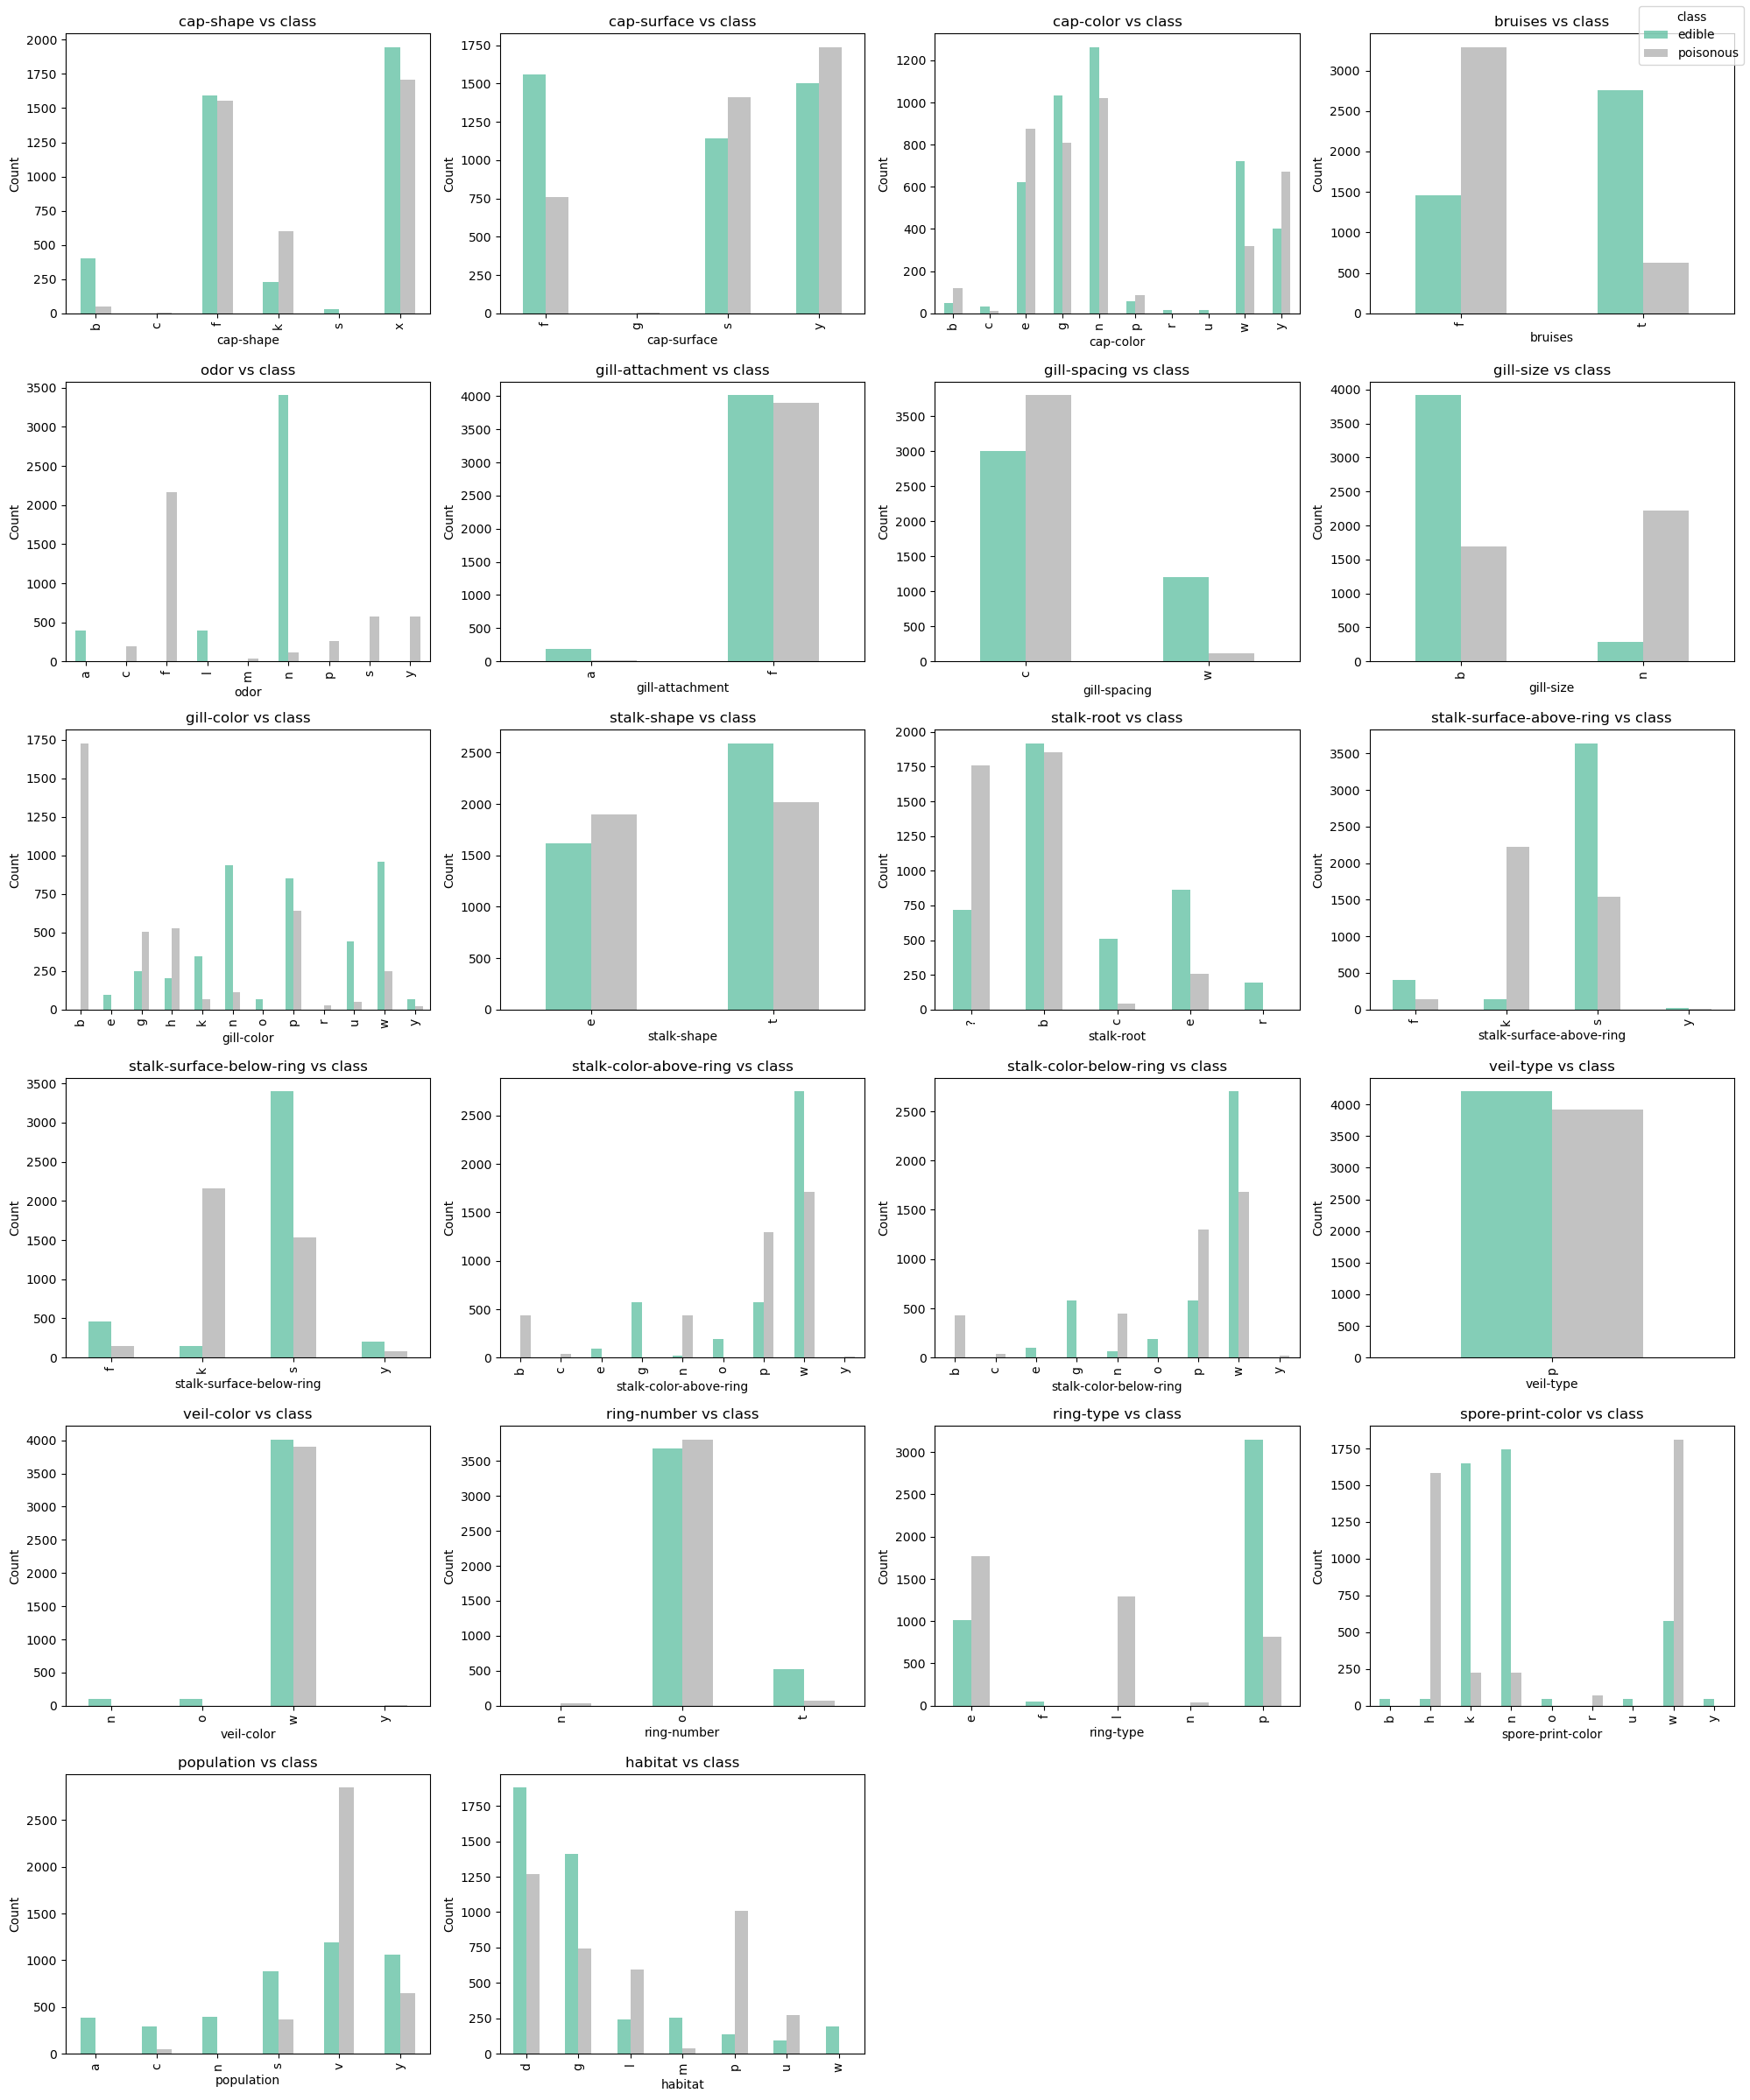

In [4]:
plot_feature_bars_grid(df,stacked=False,max_cols=4)

In [5]:
#Also wanting to plot entropy to get a better idea of what features can give the most indication of edibility
import numpy as np

def compute_log2_entropy(df, target='class'):
    entropies = {}

    for col in df.columns:
        if col == target:
            continue

        entropy = 0
        for category in df[col].unique():
            subset = df[df[col] == category][target]
            probs = subset.value_counts(normalize=True)
            entropy_category = -np.sum(probs * np.log2(probs))
            entropy += (len(subset) / len(df)) * entropy_category  

        entropies[col] = entropy

    entropy_series = pd.Series(entropies).sort_values(ascending=False)
    
    plt.figure(figsize=(10, 6))
    entropy_series.plot(kind='bar', color='skyblue')
    plt.title('Log₂ Entropy per Feature')
    plt.ylabel('Entropy')
    plt.xlabel('Feature')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    return entropy_series


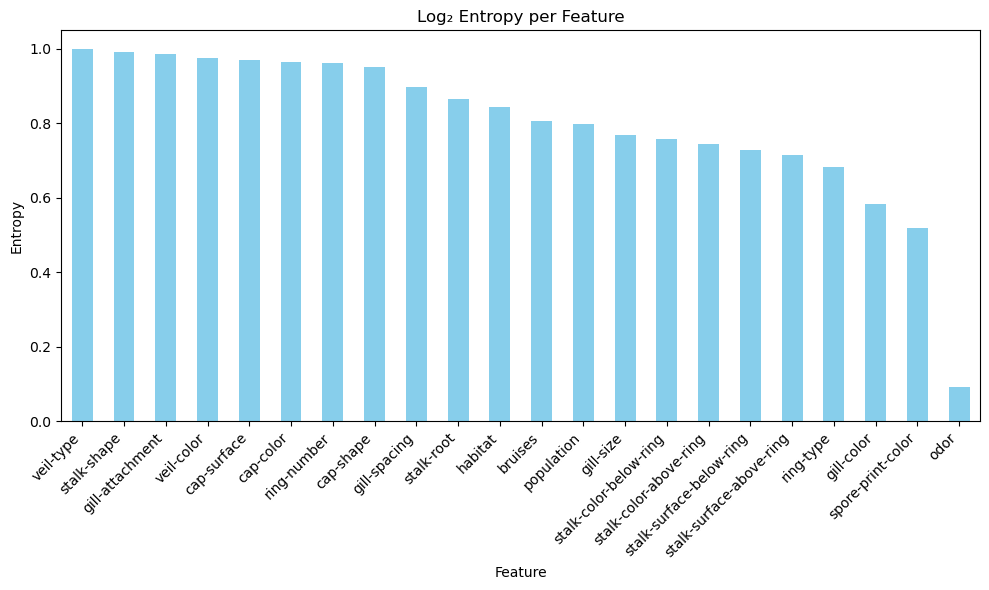

veil-type                   0.999068
stalk-shape                 0.991551
gill-attachment             0.984903
veil-color                  0.975251
cap-surface                 0.970478
cap-color                   0.963019
ring-number                 0.960615
cap-shape                   0.950271
gill-spacing                0.898185
stalk-root                  0.864250
habitat                     0.842234
bruises                     0.806688
population                  0.797110
gill-size                   0.768914
stalk-color-below-ring      0.757652
stalk-color-above-ring      0.745223
stalk-surface-below-ring    0.727173
stalk-surface-above-ring    0.714342
ring-type                   0.681046
gill-color                  0.582090
spore-print-color           0.518363
odor                        0.092993
dtype: float64

In [6]:
compute_log2_entropy(df)

In [7]:
cols_to_enc = [
    'class',               
    'cap-shape',
    'cap-surface',
    'cap-color',
    'gill-attachment',
    'gill-color',
    'population'
]
df_sub = df[cols_to_enc].copy()

In [8]:
df_sub['is_poisonous'] = df_sub['class'].map({'e': 0, 'p': 1})
df_sub.drop(columns='class', inplace=True)

In [9]:
df_sub.head()

,cap-shape,cap-surface,cap-color,gill-attachment,gill-color,population,is_poisonous
0,x,s,n,f,k,s,1
1,x,s,y,f,k,n,0
2,b,s,w,f,n,n,0
3,x,y,w,f,n,s,1
4,x,s,g,f,k,a,0


In [10]:
df_enc = pd.get_dummies(df_sub, drop_first=False)
df_enc = df_enc.map(lambda x: 0 if x==False else 1)

In [11]:
df_enc.head()

,is_poisonous,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,gill-color_r,gill-color_u,gill-color_w,gill-color_y,population_a,population_c,population_n,population_s,population_v,population_y
0,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [12]:
df_enc['bruises'] = df['bruises'].apply(lambda x: 0 if x=='f' else 1)
df_enc['odor'] = df['odor'].apply(lambda x: 0 if x=='n' else 1)
df_enc['spore-print-color'] = df['spore-print-color'].apply(lambda x: 0 if x in ('k', 'n') else 1)
df_enc['stalk-color-above-ring'] = df['stalk-color-above-ring'].apply(lambda x: 0 if x=='w' else 1)

In [13]:
df_enc.head(10)

,is_poisonous,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_a,population_c,population_n,population_s,population_v,population_y,bruises,odor,spore-print-color,stalk-color-above-ring
0,1,0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,1,1,0,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,1,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,1,0,0
4,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
6,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
8,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,1,0,0
9,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,1,0,0


In [14]:
corr = df_enc.corr()

In [15]:
corr

,is_poisonous,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_a,population_c,population_n,population_s,population_v,population_y,bruises,odor,spore-print-color,stalk-color-above-ring
is_poisonous,1.000000,-0.182567,0.023007,0.018526,0.163565,-0.060664,-0.026886,-0.195415,0.023007,0.095454,...,-0.214871,-0.137645,-0.219529,-0.159572,0.443722,-0.107055,-0.501530,0.785557,0.692269,0.217740
cap-shape_b,-0.182567,1.000000,-0.005387,-0.193260,-0.081769,-0.015264,-0.219564,-0.091638,0.018820,0.117712,...,-0.054064,0.024358,0.381589,0.158702,-0.168381,-0.120154,0.115686,0.000314,-0.058461,-0.161500
cap-shape_c,0.023007,-0.005387,1.000000,-0.017672,-0.007477,-0.001396,-0.020077,-0.014032,0.249631,-0.015038,...,-0.004944,0.106197,-0.005051,-0.009456,-0.022075,-0.011469,0.003803,-0.025332,0.021013,0.002207
cap-shape_f,0.018526,-0.193260,-0.017672,1.000000,-0.268226,-0.050070,-0.720235,0.064801,-0.006285,-0.093397,...,0.051201,-0.035214,-0.181191,-0.075804,0.034625,0.111346,0.045188,-0.066856,-0.025366,0.096448
cap-shape_k,0.163565,-0.081769,-0.007477,-0.268226,1.000000,-0.021185,-0.304733,-0.158942,0.010863,0.137988,...,-0.075036,0.140896,0.013599,-0.089360,0.172707,-0.170081,-0.229578,0.098152,0.309164,0.010608
cap-shape_s,-0.060664,-0.015264,-0.001396,-0.050070,-0.021185,1.000000,-0.056884,0.099464,-0.001396,-0.042607,...,-0.014007,-0.013143,-0.014311,-0.026791,0.000341,0.044603,-0.053026,-0.071775,-0.066421,-0.056941
cap-shape_x,-0.026886,-0.219564,-0.020077,-0.720235,-0.304733,-0.056884,1.000000,0.063511,-0.020077,-0.040634,...,0.022375,-0.065496,-0.004586,0.059264,-0.060421,0.044626,0.048557,0.015817,-0.128806,-0.019439
cap-surface_f,-0.195415,-0.091638,-0.014032,0.064801,-0.158942,0.099464,0.063511,1.000000,-0.014032,-0.428362,...,0.105739,-0.132135,-0.053190,-0.033553,-0.116485,0.210552,-0.028808,-0.286171,-0.200543,0.097933
cap-surface_g,0.023007,0.018820,0.249631,-0.006285,0.010863,-0.001396,-0.020077,-0.014032,1.000000,-0.015038,...,-0.004944,0.106197,-0.005051,-0.009456,-0.022075,-0.011469,0.026321,-0.025332,0.021013,-0.020097
cap-surface_s,0.095454,0.117712,-0.015038,-0.093397,0.137988,-0.042607,-0.040634,-0.428362,-0.015038,1.000000,...,0.088918,0.112554,0.090846,0.187716,0.019574,-0.339696,-0.104439,0.125137,0.144499,-0.251211


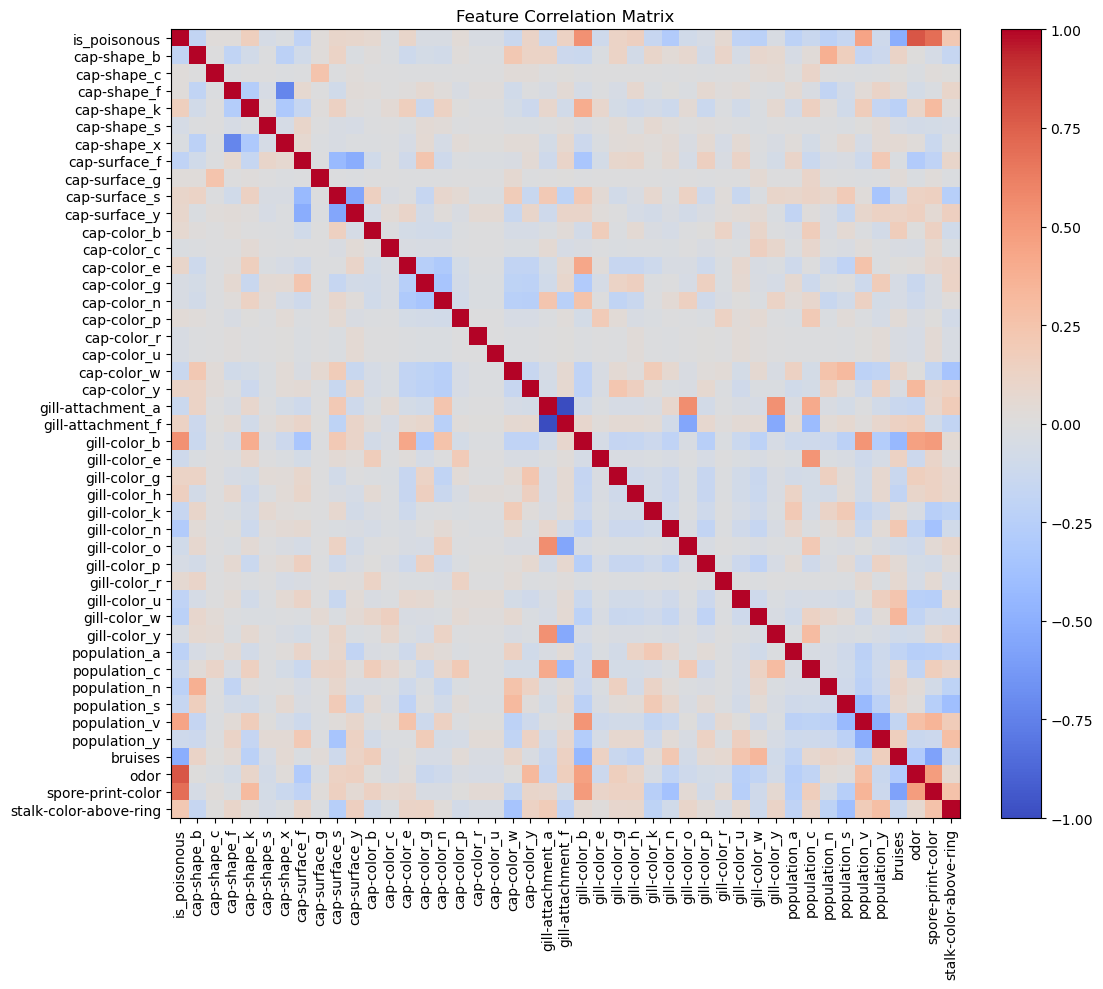

In [16]:
# Plotting corr. matrix as heatmap to visually see and sort of validate reasoning for picking features such as odor, 
# seen in just the first row/column, how correlated it is with being poisonous. 
plt.figure(figsize=(12, 10))
im = plt.imshow(corr, 
                interpolation='nearest', 
                cmap='coolwarm', 
                vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.046, pad=0.04)

labels = corr.columns
plt.xticks(range(len(labels)), labels, rotation=90)
plt.yticks(range(len(labels)), labels)

plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [17]:
#-Split/train data
from sklearn.model_selection import train_test_split

X = df_enc.drop(columns='is_poisonous')
y = df_enc['is_poisonous']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [18]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=42)
DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_DT = DT.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_DT))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_DT))
print("Classification Report:\n", classification_report(y_test, y_pred_DT,target_names=['edible', 'poisonous']))

Accuracy: 0.9796923076923076
Confusion Matrix:
 [[833  10]
 [ 23 759]]
Classification Report:
               precision    recall  f1-score   support

      edible       0.97      0.99      0.98       843
   poisonous       0.99      0.97      0.98       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



/tmp/ipykernel_401/3841042658.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
/tmp/ipykernel_401/3841042658.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


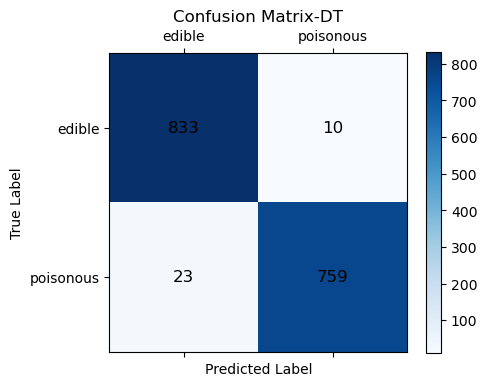

In [20]:
cm = confusion_matrix(y_test, y_pred_DT) 
labels = ['edible', 'poisonous']

fig, ax = plt.subplots(figsize=(5, 4))
cax = ax.matshow(cm, cmap=plt.cm.Blues)

plt.colorbar(cax)

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix-DT')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, str(cm[i, j]), va='center', ha='center', color='black', fontsize=12)

plt.tight_layout()
plt.show()


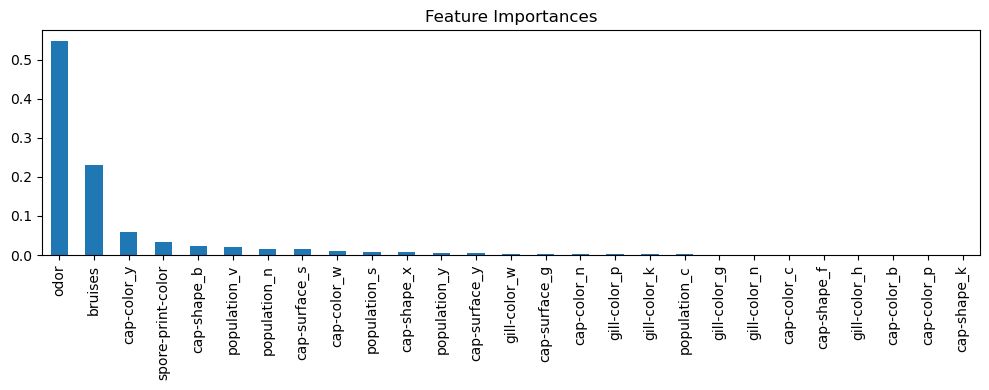

In [21]:
importances = pd.Series(DT.feature_importances_, index=X.columns)
importances = importances[importances > 0].sort_values(ascending=False)

importances.plot(kind='bar', figsize=(10, 4), title="Feature Importances")
plt.tight_layout()
plt.show()

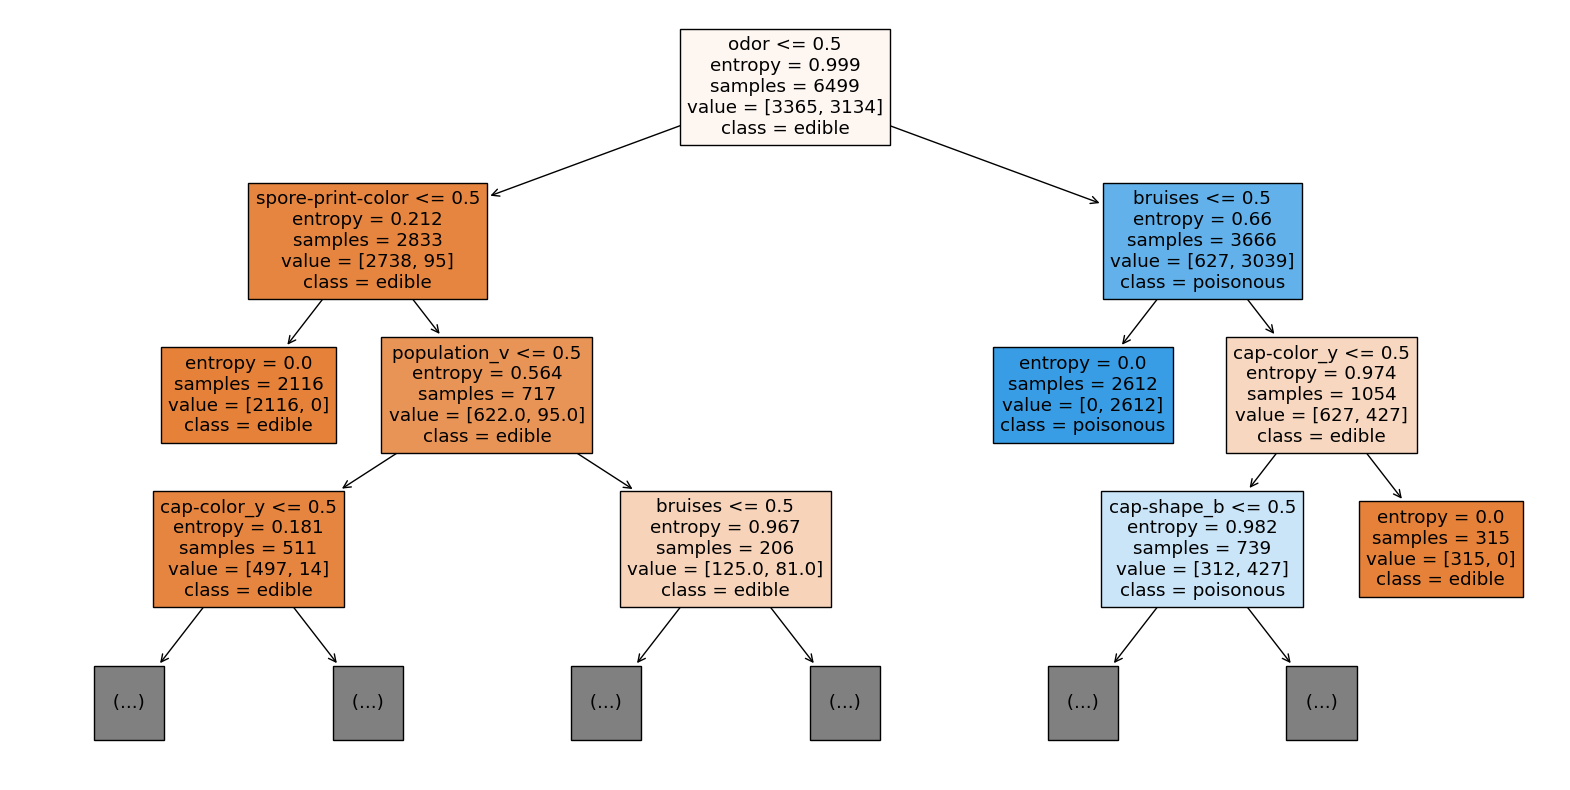

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(DT, feature_names=X.columns, class_names=['edible', 'poisonous'], filled=True, max_depth=3)
plt.show()


In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
y_pred_RF = rf.predict(X_test)

In [25]:
print("Classification Report:")
print(classification_report(y_test, y_pred_RF))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       843
           1       0.99      0.97      0.98       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



/tmp/ipykernel_401/2014382422.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
/tmp/ipykernel_401/2014382422.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


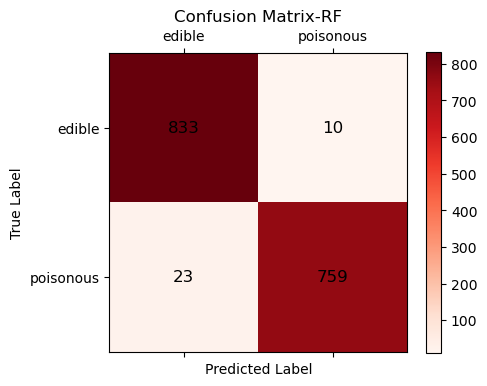

In [26]:
cm = confusion_matrix(y_test, y_pred_RF) 
labels = ['edible', 'poisonous']

fig, ax = plt.subplots(figsize=(5, 4))
cax = ax.matshow(cm, cmap=plt.cm.Reds)

plt.colorbar(cax)

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix-RF')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, str(cm[i, j]), va='center', ha='center', color='black', fontsize=12)

plt.tight_layout()
plt.show()

In [27]:
from tabulate import tabulate

report_dict = classification_report(y_test, y_pred_DT, target_names=['edible', 'poisonous'], output_dict=True)

rows = []
for label, metrics in report_dict.items():
    if isinstance(metrics, dict):
        rows.append([label, 
                     round(metrics['precision'], 3), 
                     round(metrics['recall'], 3), 
                     round(metrics['f1-score'], 3), 
                     int(metrics['support'])])
    elif label == 'accuracy':
        rows.append([label, '', '', round(metrics, 3), report_dict['edible']['support'] + report_dict['poisonous']['support']])

headers = ["Label", "Precision", "Recall", "F1-Score", "Support"]

print(tabulate(rows, headers=headers, tablefmt="fancy_grid"))


╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Label        │ Precision   │ Recall   │   F1-Score │   Support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ edible       │ 0.973       │ 0.988    │      0.981 │       843 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ poisonous    │ 0.987       │ 0.971    │      0.979 │       782 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │             │          │      0.98  │      1625 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ macro avg    │ 0.98        │ 0.979    │      0.98  │      1625 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ weighted avg │ 0.98        │ 0.98     │      0.98  │      1625 │
╘══════════════╧═════════════╧══════════╧════════════╧═══════════╛
